In [41]:
import FinanceDataReader as fdr
import time
from collections import deque
import datetime

# 내 집갑의 원화 잔고 조회
def get_balance_krw(balances):
    return print('내 지갑 잔고 = ', balances[0]['balance'])

# 내 지갑의 코인 잔고 조회
def get_balance_coin(balances):
    b = True
    while (b):
        if balances[1]['currency'] == 'MMM':
            balance = balances[1]['balance']
            avg_buy_price = balances[1]['avg_buy_price']
            c = (float(avg_buy_price), float(balance))
            b = False
        else:
            c = (int(0), int(0))
            b = False
    return c

def get_ticker_ma(volume, df, balances):

    ma5 = df['Close'].rolling(window=5).mean()
    df.insert(len(df.columns), "MA5", ma5)

    ma20 = df['Close'].rolling(window=20).mean()
    df.insert(len(df.columns), "MA20", ma20)
    
    now_price = df['Close'][-1]                         # 코인의 현재가
    coin_check = get_balance_coin(balances) # 코인 보유 하고 있는지 체크
    avg_price = coin_check[0]                          # 매수 평균가
    balance = coin_check[1]                             # 코인 보유 개수
    
    # 매수 평균가가 int 이면 매수 조건 체크 float이면 매도 조건 체크
    if type(avg_price) == int:

        if df['MA5'][-1] > df['MA20'][-1]:
            # 살 가격 정하기
            buy_price = volume
            buy_order(buy_price, balances)
        else:
            print('MA5 : {:,.3f}    MA20 : {:,.3f}'.format(df['MA5'][-1], df['MA20'][-1]))
            print('기다리는 중')
            pass
    else:
        # 현재 보유 코인 수익률 계산
        buy_profit = ((now_price - avg_price)/avg_price) * 100
        profit = round(buy_profit, 2)

        if df['MA5'][-1] < df['MA20'][-1] or avg_price > now_price:
            sell_order(balances)
        else:
            print(f"코인명: ETH, 수익률: {profit}%")
            print("내가산 가격 = {}, 시장가격 = {}".format(avg_price, now_price))

# 매수 주문
def buy_order(buy_price, balances):
    while True:
        # 8000원을 빼고 
        print("내가 산 금액 = {:,.0f}원".format( buy_price))
        balances[0]['balance'] = float(balances[0]['balance']) - buy_price
        balances[1]['currency'] = 'MMM'
        # 8000원을 종가로 나누어 코인갯수 구하기
        balances[1]['balance'] = float(buy_price / df['Close'][-1])
        #샀을때의 가격
        balances[1]['avg_buy_price'] = float(df['Close'][-1])
        print('매수 체결')
        return

# 매도 주문
def sell_order(balances):
    while True:
        # 내가 가지고 있는 코인 갯수를 종가와 곱해서 팔았을때의 가격 측정
        sell_price = df['Close'][-1] * (balances[1]['balance'])
        print("내가 판 금액 = {:,.0f}원".format(sell_price))
        balances[1]['currency'] = ''
        balances[1]['balance'] = ''
        balances[1]['avg_buy_price'] = ''
        # 팔았을 때의 가격을 기존의 지갑잔고에 더하기
        balances[0]['balance'] = balances[0]['balance'] + sell_price
        print('매도 체결')
        print('*** 내 지갑 잔고 = {:,.0f}원 ***'.format(balances[0]['balance']))
        return

i = 0
tickers = []
ma5 = []
ma20 = []
ma60 = []
balances = []
df_SP500 = fdr.StockListing('SP500')
tickers = list(df_SP500['Symbol'])
# 시작 날짜 입력
day = datetime.datetime(2020,1,1)
# 주식차트 기준 시간 입력
interval = 'day'
# day = 24, minute240 = 4
time_select = 24
# 주식종목 입력
ticker_select = tickers[0]
# 초기 지갑 잔고 입력
volume = 10000
# 초기 지갑설정
balances = ({'currency': 'KRW', 'balance': '{}'.format(volume), 'avg_buy_price': ''}, {'currency': '', 'balance': '', 'avg_buy_price': ''})
while True:
    i += 1
    startday = day - datetime.timedelta(days = 40)
    endday_change = '{}-{}-{}'.format(day.year, day.month, day.day)
    startday_change = '{}-{}-{}'.format(startday.year, startday.month, startday.day)
    
    df = fdr.DataReader(symbol=ticker_select, start=startday_change, end=endday_change)
    # 시간에 4시간씩 계속 추가
    day = day + datetime.timedelta(hours = time_select)
    if i == 24:
        i = 0
    print('---------------------------------------------')
    print(day)
    volume = float(balances[0]['balance'])
    # 종료 날짜 입력
    if day == datetime.datetime(2021, 1, 1):
        if balances[1]['currency'] == 'MMM':
            final_balances = float(balances[0]['balance']) + float(balances[1]['balance']) * float(df['close'][-1])
        else:
            final_balances = float(balances[0]['balance'])
        print('*** 내 지갑 잔고 = {:,.0f}원 ***'.format(final_balances))
        break
    get_ticker_ma(volume, df, balances)W
    time.sleep(0.1)


---------------------------------------------
2020-01-02 00:00:00
내가 산 금액 = 10,000원
매수 체결
---------------------------------------------
2020-01-03 00:00:00
코인명: ETH, 수익률: 0.0%
내가산 가격 = 176.419998, 시장가격 = 176.419998
---------------------------------------------
2020-01-04 00:00:00
코인명: ETH, 수익률: 2.03%
내가산 가격 = 176.419998, 시장가격 = 180.0
---------------------------------------------
2020-01-05 00:00:00
코인명: ETH, 수익률: 1.15%
내가산 가격 = 176.419998, 시장가격 = 178.449997
---------------------------------------------
2020-01-06 00:00:00
코인명: ETH, 수익률: 1.15%
내가산 가격 = 176.419998, 시장가격 = 178.449997
---------------------------------------------
2020-01-07 00:00:00
코인명: ETH, 수익률: 1.15%
내가산 가격 = 176.419998, 시장가격 = 178.449997
---------------------------------------------
2020-01-08 00:00:00
코인명: ETH, 수익률: 1.25%
내가산 가격 = 176.419998, 시장가격 = 178.619995
---------------------------------------------
2020-01-09 00:00:00
코인명: ETH, 수익률: 0.84%
내가산 가격 = 176.419998, 시장가격 = 177.899994
----------------------------------

KeyError: 'close'

In [4]:
import pyupbit
import datetime

tickers = pyupbit.get_tickers(fiat = 'KRW')
ticker_select = tickers[0]
interval = 'day'
day = datetime.datetime(2021,1,1)
df = pyupbit.get_ohlcv(ticker = ticker_select, interval = interval, to = day)
df

,open,high,low,close,volume,value
2020-06-15 09:00:00,11246000.0,11415000.0,10770000.0,11346000.0,4693.793931,5.201435e+10
2020-06-16 09:00:00,11339000.0,11492000.0,11267000.0,11453000.0,3026.568243,3.450289e+10
2020-06-17 09:00:00,11453000.0,11517000.0,11320000.0,11437000.0,2739.255456,3.123835e+10
2020-06-18 09:00:00,11437000.0,11445000.0,11224000.0,11341000.0,2323.411973,2.638181e+10
2020-06-19 09:00:00,11341000.0,11382000.0,11150000.0,11286000.0,2389.517785,2.694653e+10
...,...,...,...,...,...,...
2020-12-27 09:00:00,29378000.0,31800000.0,28802000.0,29319000.0,19899.625914,6.015242e+11
2020-12-28 09:00:00,29347000.0,30587000.0,29167000.0,30249000.0,8175.159923,2.455058e+11
2020-12-29 09:00:00,30219000.0,30520000.0,29028000.0,30498000.0,7302.220616,2.180911e+11
2020-12-30 09:00:00,30498000.0,31999000.0,30333000.0,31891000.0,10282.822805,3.209409e+11


In [8]:

tickers = pyupbit.get_tickers(fiat = 'KRW')
tickers

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLY',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-MFT',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',
 'KRW-PLA',

In [34]:

startday = day - datetime.timedelta(days = 21)
df = fdr.DataReader(symbol='MMM', start = startday, end='2021-01-05')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-11,170.729996,170.740005,167.600006,169.210007,157.810257,2884400
2020-11-12,168.149994,169.190002,165.580002,167.050003,155.795761,2216700
2020-11-13,167.919998,170.259995,167.279999,169.789993,158.351151,1812100
2020-11-16,172.619995,173.889999,170.179993,173.860001,162.146988,2434300
2020-11-17,173.039993,174.500000,170.860001,173.639999,161.941788,2589900
2020-11-18,174.500000,174.699997,171.330002,171.399994,159.852722,2615800
2020-11-19,170.570007,171.880005,169.300003,171.610001,161.433075,2986000
2020-11-20,171.500000,172.949997,170.960007,172.889999,162.637161,2656900
2020-11-23,173.759995,174.860001,173.449997,174.139999,163.813049,2064300


In [32]:

day = datetime.datetime(2021,1,1)
day_change = '{}-{}-{}'.format(day.year, day.month, day.day)
day_change
day = day - datetime.timedelta(days = 30)
day

datetime.datetime(2020, 12, 2, 0, 0)

In [8]:
import FinanceDataReader as fdr
df = fdr.DataReader(symbol='US500', start = '2020-01-01', end='2021-12-31')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2021-12-23,4703.959961,4740.740234,4703.959961,4725.790039,4725.790039,2913040000
2021-12-27,4733.990234,4791.490234,4733.990234,4791.189941,4791.189941,2770290000
2021-12-28,4795.490234,4807.020020,4780.040039,4786.350098,4786.350098,2707920000


In [10]:

ma10 = df['Close'].rolling(window=10).mean()
df.insert(len(df.columns), "MA10", ma10)

ma25 = df['Close'].rolling(window=25).mean()
df.insert(len(df.columns), "MA25", ma25)

ma50 = df['Close'].rolling(window=50).mean()
df.insert(len(df.columns), "MA50", ma50)


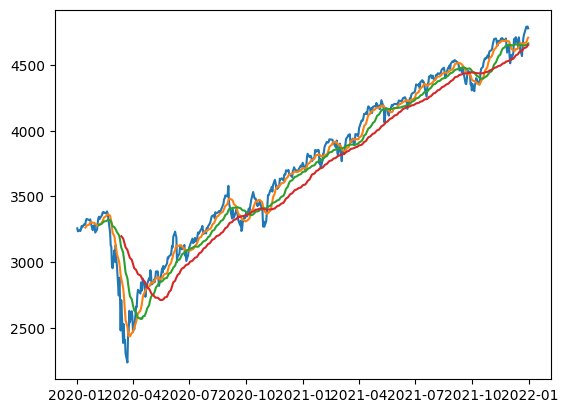

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['MA10'])
plt.plot(df['MA25'])
plt.plot(df['MA50'])